In [1]:
import pandas as pd
import os
from pathlib import Path  # Path import 추가

In [2]:
directory = os.path.join(str(Path.home()), 'Downloads', '소비 분석 카테고리_데이터')

print(f"폴더 경로: {directory}")

폴더 경로: C:\Users\eunju\Downloads\소비 분석 카테고리_데이터


In [3]:
filename = 'TB_CL_MTH_SALES_YMD_20210728_02n.csv'
file_path = os.path.join(directory, filename)

In [4]:
df = pd.read_csv(file_path)

In [5]:
df.head()

,cfmtn_ymd,fdmt_pdlt_lgls_code,fdmt_pdlt_lgls_nm,fdmt_pdlt_mdcl_code,fdmt_pdlt_mdcl_nm,fdmt_pdlt_smcs_code,fdmt_pdlt_smcs_nm,fdmt_pdlt_code,fdmt_pdlt_nm,brcd_info,tot_sle_qyt
0,20201128,1002.0,농산물,2026.0,과채류,3368.0,꽈리고추,72,꽈리고추(국내산),2.900720e+17,1012.0
1,20201128,1002.0,농산물,2026.0,과채류,3368.0,꽈리고추,72,꽈리고추(국내산),2.900720e+17,1016.0
2,20201128,1002.0,농산물,2041.0,농산가공,3447.0,다진생강,20174,다진생강 500G/동호/국산,8.809390e+12,1.0
3,20201128,1003.0,비식품,2110.0,일회/포장용품,4694.0,일회용기,32208,삼총사대(몸2+뚜껑1) 1묶음(100입),8.809305e+12,1.0
4,20201128,1003.0,비식품,2110.0,일회/포장용품,5445.0,호일,76832,삼원호일 30CM(300*30)/삼원상사,8.804341e+12,2.0


In [6]:
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv') and f.startswith('TB_CL_MTH_SALES_YMD_2023')]

In [7]:
print(csv_files)

['TB_CL_MTH_SALES_YMD_20230301_01n.csv', 'TB_CL_MTH_SALES_YMD_20230301_02n.csv', 'TB_CL_MTH_SALES_YMD_20230301_03n.csv', 'TB_CL_MTH_SALES_YMD_20230301_04n.csv', 'TB_CL_MTH_SALES_YMD_20230301_05n.csv', 'TB_CL_MTH_SALES_YMD_20230301_06n.csv', 'TB_CL_MTH_SALES_YMD_20230301_07n.csv', 'TB_CL_MTH_SALES_YMD_20230301_08n.csv', 'TB_CL_MTH_SALES_YMD_20231006_01.csv', 'TB_CL_MTH_SALES_YMD_20231006_02.csv', 'TB_CL_MTH_SALES_YMD_20231006_03.csv', 'TB_CL_MTH_SALES_YMD_20231006_04.csv', 'TB_CL_MTH_SALES_YMD_20231006_05.csv', 'TB_CL_MTH_SALES_YMD_20231006_06.csv']


In [8]:
dfs = []

for csv_file in csv_files:
    file_path = os.path.join(directory, csv_file)
    try:
        df = pd.read_csv(file_path, encoding='utf-8', low_memory=False, dtype={9: str})  
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='cp949', low_memory=False, dtype={9: str})  
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

In [9]:
combined_df.head()

,cfmtn_ymd,fdmt_pdlt_lgls_code,fdmt_pdlt_lgls_nm,fdmt_pdlt_mdcl_code,fdmt_pdlt_mdcl_nm,fdmt_pdlt_smcs_code,fdmt_pdlt_smcs_nm,fdmt_pdlt_code,fdmt_pdlt_nm,brcd_info,tot_sle_qyt
0,20221111,1001,가공상품,2046,두부류,3538.0,두부,91123,촌두부(찌개/부침겸용) 480G/통일식품,8809183760020,1.0
1,20221111,1003,비식품,5436,종량제,5438.0,종량제봉투,67437,종량제봉투(북구) 20L,NaN,1.0
2,20221111,1004,수산물,2009,건어류,4025.0,북어,30104,북어채 150G/진미식품(주),8802232035568,1.0
3,20221111,1002,농산물,2033,나물류,4283.0,숙주나물,92151,숙주나물 300G/남산농원,8809026750911,1.0
4,20221111,1001,가공상품,2107,음료류,4168.0,생수,67915,생수(지리산산수) 2L/삼립,NaN,12.0


In [10]:
column_mapping = {
    'cfmtn_ymd': '확정일자',
    'fdmt_pdlt_lgls_code': '식자재품목대분류코드',
    'fdmt_pdlt_lgls_nm': '식자재품목대분류명',
    'fdmt_pdlt_mdcl_code': '식자재품목중분류코드',
    'fdmt_pdlt_mdcl_nm': '식자재품목중분류명',
    'fdmt_pdlt_smcs_code': '식자재품목소분류코드',
    'fdmt_pdlt_smcs_nm': '식자재품목소분류명',
    'fdmt_pdlt_code': '식자재품목코드',
    'fdmt_pdlt_nm': '식자재품목명',
    'brcd_info': '바코드정보',
    'tot_sle_qyt': '총판매수량'
}

# 컬럼명 변경
combined_df = combined_df.rename(columns=column_mapping)



In [21]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32920185 entries, 0 to 32920184
Data columns (total 11 columns):
 #   Column      Dtype         
---  ------      -----         
 0   확정일자        datetime64[ns]
 1   식자재품목대분류코드  int64         
 2   식자재품목대분류명   object        
 3   식자재품목중분류코드  int64         
 4   식자재품목중분류명   object        
 5   식자재품목소분류코드  float64       
 6   식자재품목소분류명   object        
 7   식자재품목코드     int64         
 8   식자재품목명      object        
 9   바코드정보       object        
 10  총판매수량       float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 2.7+ GB


In [23]:
import matplotlib.pyplot as plt
import koreanize_matplotlib


In [18]:
combined_df['확정일자'] = pd.to_datetime(combined_df['확정일자'].astype(str), errors='coerce')

In [19]:
combined_df['확정일자'].head()

0   2022-11-11
1   2022-11-11
2   2022-11-11
3   2022-11-11
4   2022-11-11
Name: 확정일자, dtype: datetime64[ns]

In [13]:
#pip install koreanize-matplotlib

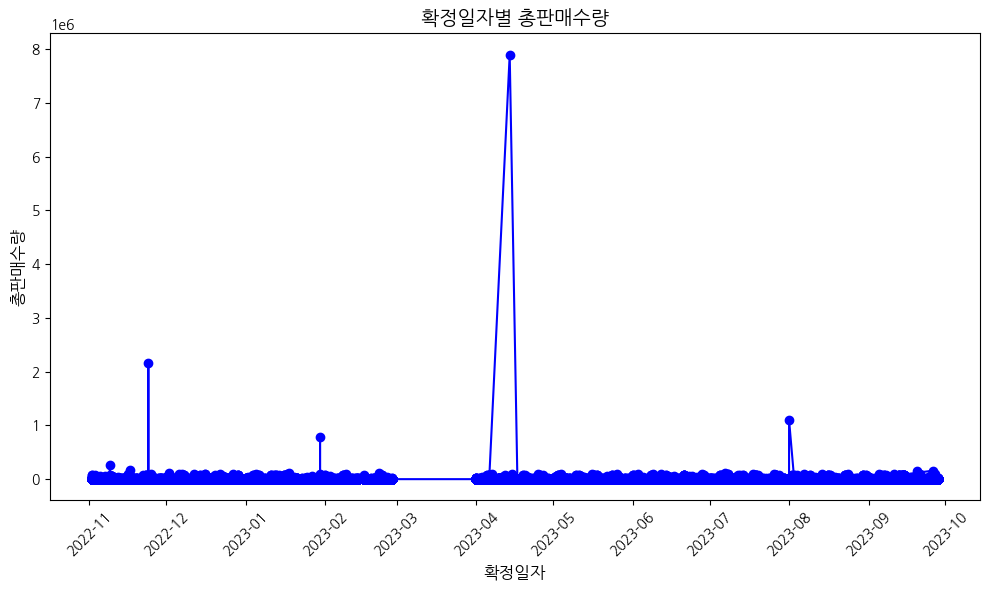

In [20]:

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(combined_df['확정일자'], combined_df['총판매수량'], marker='o', linestyle='-', color='b')

# Adding titles and labels with Korean text
plt.title('확정일자별 총판매수량', fontsize=14)
plt.xlabel('확정일자', fontsize=12)
plt.ylabel('총판매수량', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

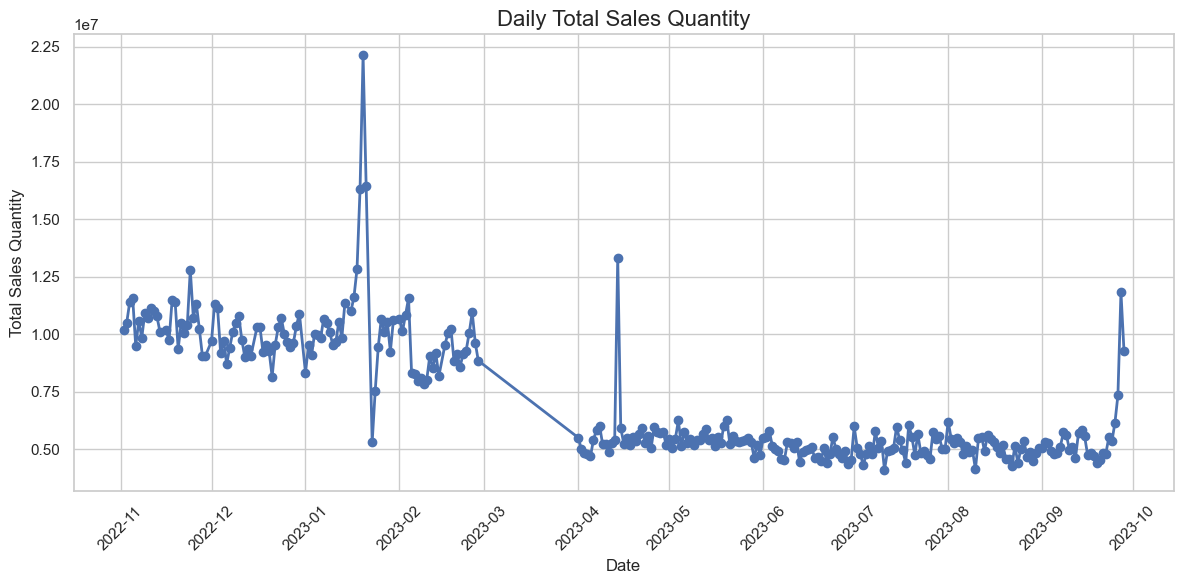

In [27]:
sns.set(style="whitegrid")

sales_by_date = combined_df.groupby('확정일자')['총판매수량'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date['확정일자'], sales_by_date['총판매수량'], marker='o', color='b', linestyle='-', linewidth=2)

plt.title('Daily Total Sales Quantity', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales Quantity', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [33]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔글꼴 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rc('font', family=font_name)


C:\Users\eunju\AppData\Local\Temp\ipykernel_16724\1188008433.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='총판매수량', y='식자재품목대분류명', data=sales_by_category, palette='Blues_d')


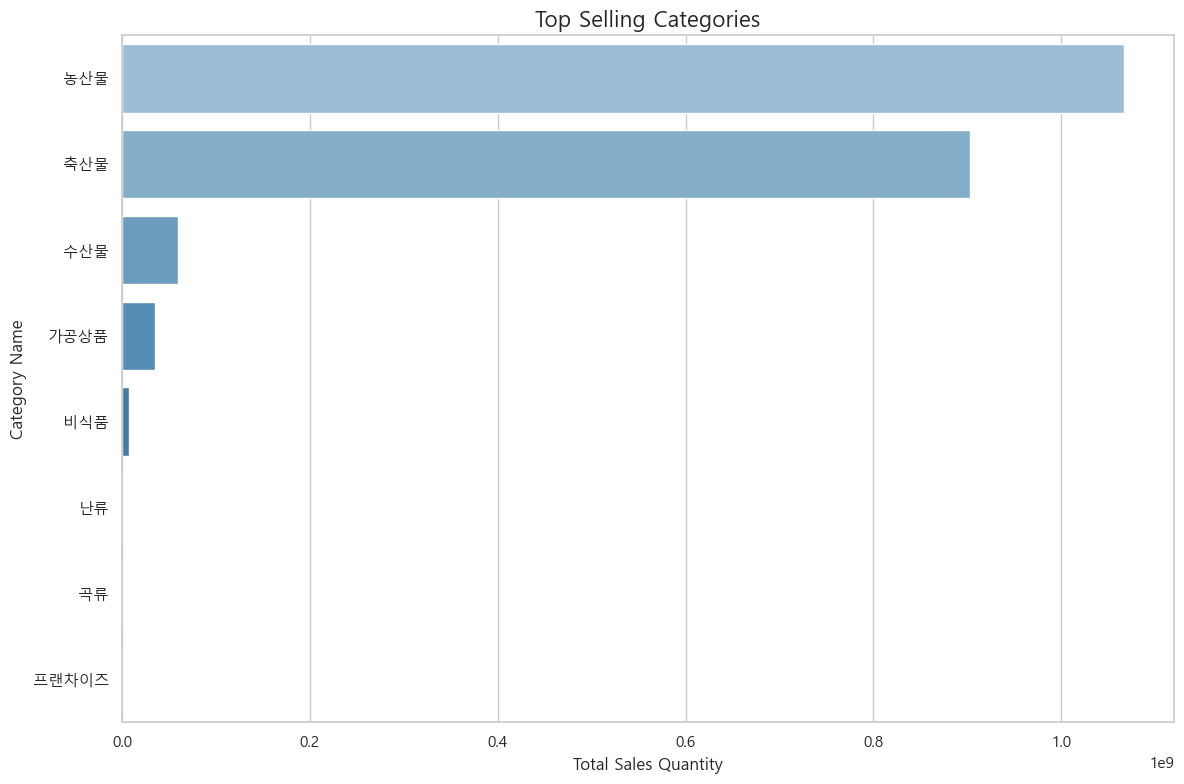

In [34]:
sales_by_category = combined_df.groupby('식자재품목대분류명')['총판매수량'].sum().reset_index()

# Sort the categories by total sales in descending order
sales_by_category = sales_by_category.sort_values(by='총판매수량', ascending=False)

# Plotting the top-selling categories
plt.figure(figsize=(12, 8))
sns.barplot(x='총판매수량', y='식자재품목대분류명', data=sales_by_category, palette='Blues_d')

# Adding English titles and labels
plt.title('Top Selling Categories', fontsize=16)
plt.xlabel('Total Sales Quantity', fontsize=12)
plt.ylabel('Category Name', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\eunju\AppData\Local\Temp\ipykernel_16724\3240027815.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='총판매수량', y='식자재품목중분류명', data=sales_by_category, palette='Blues_d')


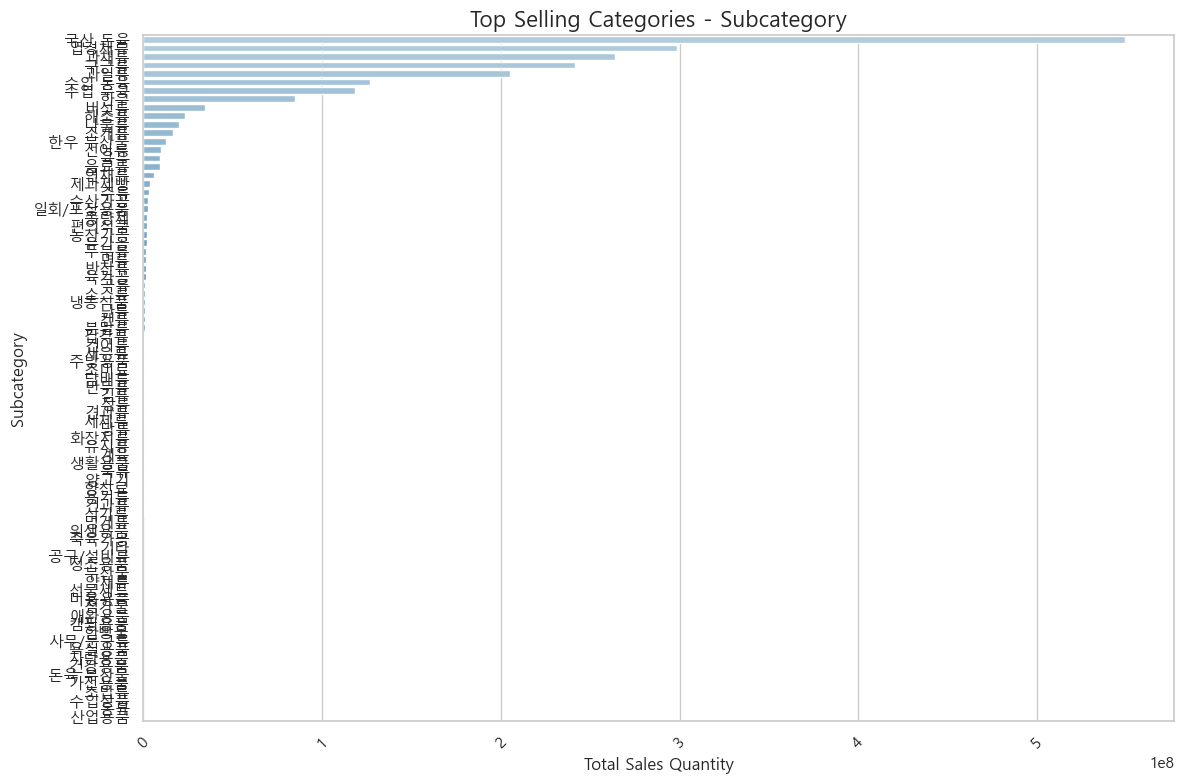

In [36]:
sales_by_category = combined_df.groupby('식자재품목중분류명')['총판매수량'].sum().reset_index()

# Sort the categories by total sales in descending order
sales_by_category = sales_by_category.sort_values(by='총판매수량', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='총판매수량', y='식자재품목중분류명', data=sales_by_category, palette='Blues_d')

# Adding English titles and labels
plt.title('Top Selling Categories - Subcategory', fontsize=16)
plt.xlabel('Total Sales Quantity', fontsize=12)
plt.ylabel('Subcategory', fontsize=12)

# Rotate the y-axis labels to prevent overlap
plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal (default)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

# Adjust the layout to prevent text overlap
plt.tight_layout()

# Show the plot
plt.show()